In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA

c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\sktime\utils\validation\_dependencies.py:113: UserWarning: No module named 'pmdarima'. 'pmdarima' is a soft dependency and not included in the sktime installation. Please run: `pip install pmdarima` to install the pmdarima package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)


In [5]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)

# step 3: specifying the forecasting algorithm
naive_fc = NaiveForecaster(strategy="last", sp=12)
arima_fc = AutoARIMA()

# step 4: fitting the forecaster
naive_fc.fit(y)
arima_fc.fit(y)

# step 5: querying predictions
y_pred_naive = naive_fc.predict(fh)
y_pred_arima = arima_fc.predict(fh)

c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\statsmodels\tsa\statespace\sar

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

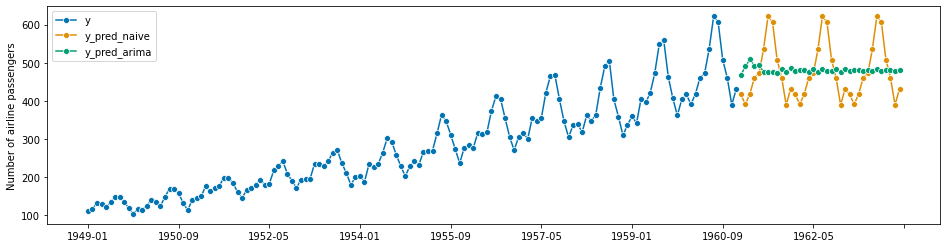

In [6]:
# optional: plotting predictions and past data
plot_series(y, y_pred_naive, y_pred_arima, labels=["y", "y_pred_naive", "y_pred_arima"])